根据比电容的定义，我们有
$$C_p=\frac{Q}{mV}=\frac{I\Delta t}{m\Delta V} \tag{1}$$
上下同时除以$\Delta t$可以得到
$$C_p=\frac{I}{m(\frac{\Delta V}{\Delta t})} \tag{2}$$
记扫描速率$k=\frac{\Delta V}{\Delta t}$，可以得到
$$C_p=\frac{I}{mk}\tag{3}$$
即
$$I=mkC_p\tag{4}$$
考虑CV曲线从$V_1$到$V_2$的单调过程
$$\int_{V_1}^{V_2}I(V)dV=\int_{V_1}^{V_2}mkC_pdV\tag{5}$$
$m,k,C_p$均为常数，因此
$$\int_{V_1}^{V_2}I(V)dV=(V_2-V_1)mkC_p\tag{6}$$
我们假设$V_2>V_1$。在CV曲线的充电过程中，
$$\int_{V_1}^{V_2}I_{up}(V)dV=(V_2-V_1)mkC_p\tag{7}$$
在放电过程中，
$$\int_{V_2}^{V_1}I_{down}(V)dV=(V_1-V_2)mkC_p\tag{8}$$
因此
$$C_p=\frac{Area}{2(V_2-V_1)mk}\tag{9}$$
其中$Area$是CV曲线围成的面积，用多边形的面积来近似。

Average Area: 0.018906214900000017
比电容 Cp = 63.87234763513518 F/g


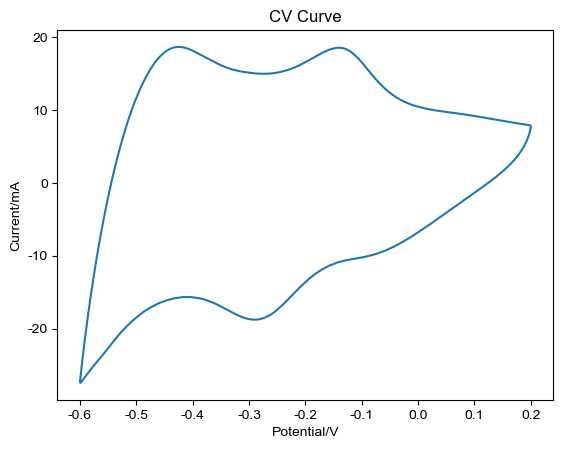

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 将画图部分的字体统一为Arial
from matplotlib import rcParams
config = {
    "font.family":'Arial',  # 设置字体类型
    "axes.unicode_minus": False  #解决负号无法显示的问题
}
rcParams.update(config)

# 假设每次循环的电压窗口为a ~ b，则要求电压扫描为b → a → b → a → ··· → b
# 第一个循环的数据不采用

# 每次运行前更改
# m为活性物质的质量，单位为mg
# k为CV扫描的速率，单位为mV/s

m = 1.85
k = 100

coordinates = []

# 读取文件内数据
with open('CV.txt', 'r') as file:
    for i in range(2):
        line = file.readline().strip()
        parts = line.split(',')
        
        # 确保每行有两个值
        if len(parts) == 2:
            try:
                V = float(parts[0])
                I = float(parts[1])
                
                # 如果是第一行
                if i == 0:
                    first_V = V
                    first_I = I
                # 如果是第二行
                elif i == 1:
                    second_V = V
                    second_I = I
            except ValueError:
                print(f"无法解析行：{line}")

    # 计算DST值
    if first_V is not None and second_V is not None:
        if first_V >= second_V:
            DST = 1
        else:
            DST = 0
    
    # 重置文件指针
    file.seek(0)
    
    # 重新读取文件并处理数据
    for line in file:
        # 移除行末的换行符并使用逗号分隔符分割行
        parts = line.strip().split(',')
        
        # 确保行包含两个值
        if len(parts) == 2:
            # 将两个值转换为浮点数，并创建坐标点
            try:
                V = float(parts[0])
                I = float(parts[1])
                if DST == 0:
                   V = -V
                   I = -I
                coordinate = (V, I)
                coordinates.append(coordinate)
            except ValueError:
                print(f"无法解析行：{line}")

# 定义函数，以计算多边形围成的面积
def calculate_polygon_area(coords):
    n = len(coords)
    area = 0

    j = n - 1
    for i in range(0, n):
        area += (coords[j][0] + coords[i][0]) * (coords[j][1] - coords[i][1])
        j = i

    return abs(area / 2)

# coordinates列表包含了每一个坐标(V,I)
# 获取V坐标的最大值
V_values = [coord[0] for coord in coordinates]  # 在使用前定义 V_values
max_first_coordinate = max(coordinates, key=lambda x: x[0])

max_first_coordinate = max(coordinates, key=lambda x: x[0])

# 获取所有最大值的索引
max_first_coordinate_indices = [i for i, coord in enumerate(coordinates) if coord[0] == max_first_coordinate[0]]
# 如果最大值只存在两个，而且索引列表长度为2
if len(max_first_coordinate_indices) == 2:
    # 复制 coordinates 的第一项并添加到末尾
    coordinates.append(coordinates[0][:])
    max_first_coordinate_indices = [i for i, coord in enumerate(coordinates) if coord[0] == max_first_coordinate[0]]


# 创建一个空列表来存储每个索引范围内的坐标
coordinate_ranges = []

# 使用循环获取每两个索引之间的坐标
for i in range(len(max_first_coordinate_indices) - 1):
    start_index = max_first_coordinate_indices[i]
    end_index = max_first_coordinate_indices[i + 1]

    
    # 使用切片提取坐标并存储在一个变量中
    selected_coordinates = coordinates[start_index:end_index]
    
    # 将坐标添加到列表中
    coordinate_ranges.append(selected_coordinates)

# 建立一个数组，储存每一个循环的面积
areas = []

# 计算每个循环的面积
for coordinates_range in coordinate_ranges:
    area = calculate_polygon_area(coordinates_range)
    areas.append(area)

# 计算循环面积的平均值
average_area = sum(areas[1:]) / (len(areas) - 1)  # 减去1是因为第一个循环通常是稳定的而不被计入

# 根据公式计算比电容值 Cp
delta_V = max(V_values) - min(V_values)
Cp = average_area * (10**6) / (2 * delta_V * m * k)  # 将面积单位转换为μF

print("Average Area:", average_area)
print("比电容 Cp =", Cp, "F/g")

# 将第二个循环的数据绘制成折线图
x_coordinates, y_coordinates = zip(*coordinate_ranges[1])

# 创建折线图
y_coordinates_milliamps = [i * 1000 for i in y_coordinates]  # 将电流单位转换为mA
plt.plot(x_coordinates, y_coordinates_milliamps)

# 添加标签和标题
plt.xlabel('Potential/V')
plt.ylabel('Current/mA')
plt.title('CV Curve')

# 不显示网格
plt.grid(False)

# 保存图形为矢量图
plt.savefig("CV_curve.eps", dpi=600, format="eps")

# 显示图形
plt.show()




Scan Rate: 1.0 mV/s 	  Cp: 644.22 F/g
Scan Rate: 2.0 mV/s 	  Cp: 618.10 F/g
Scan Rate: 5.0 mV/s 	  Cp: 562.87 F/g
Scan Rate: 10.0 mV/s 	  Cp: 396.14 F/g
Scan Rate: 20.0 mV/s 	  Cp: 211.49 F/g
Scan Rate: 30.0 mV/s 	  Cp: 138.69 F/g
Scan Rate: 40.0 mV/s 	  Cp: 101.12 F/g
Scan Rate: 50.0 mV/s 	  Cp: 78.63 F/g
Scan Rate: 60.0 mV/s 	  Cp: 64.21 F/g
Scan Rate: 80.0 mV/s 	  Cp: 46.09 F/g
Scan Rate: 100.0 mV/s 	  Cp: 35.60 F/g


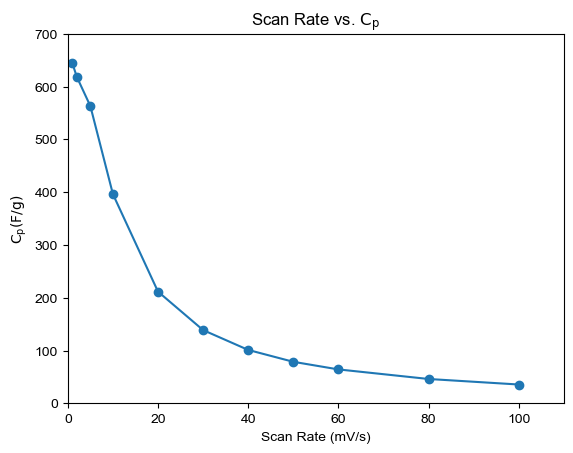

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Arial',  # 设置字体类型
    "axes.unicode_minus": False  #解决负号无法显示的问题
}
rcParams.update(config)

# 文件目录路径
directory = r'F:\Liazulene\电化学数据\LA044\044-5'

txt_files = [file for file in os.listdir(directory) if file.startswith('CV-') and file.endswith('.txt') and not file.endswith('-活化.txt')]

m = 5.58

scan_list=[]

# 计算多边形围成面积
def calculate_polygon_area(coords):
    n = len(coords)
    area = 0

    j = n - 1
    for i in range(0, n):
        area += (coords[j][0] + coords[i][0]) * (coords[j][1] - coords[i][1])
        j = i

    return abs(area / 2)

for txt_file in txt_files:
    file_path = os.path.join(directory, txt_file)
    
    # 解析文件名中的扫描速率
    k = int(txt_file.split('CV-')[1].split('mVps')[0])  # 获取 'mVps' 之前的数字部分，并转换为整数
    
    coordinates = []
    with open(file_path, 'r') as file:
        # 跳过无效行
        line = file.readline().strip()
        while not line.startswith('Potential/V'):
            line = file.readline().strip()
        # 读取有效数据
        for line in file:
            parts = line.strip().split(',')
            if len(parts) == 2:
                try:
                    V = float(parts[0])
                    I = float(parts[1])
                    coordinate = (V, I)
                    coordinates.append(coordinate)

                except ValueError:
                    print(f"无法解析行：{line}")
    
    # 获取最后一个坐标点
    last_coordinate = coordinates[-1]
    
    # 找到上一个 Potential 相同的坐标点
    for i in range(len(coordinates) - 2, -1, -1):
        if coordinates[i][0] == last_coordinate[0]:
            start_index = i
            break
    
    # 提取中间的数据
    middle_coordinates = coordinates[start_index:-1]
    V_values = [coord[0] for coord in coordinates]
    # 计算多边形围成的面积
    area = calculate_polygon_area(middle_coordinates)

    delta_V = max(V_values) - min(V_values)
    Cp = area * (10**6) / (2 * delta_V * m * k)
    scan_num = (k,Cp) 
    scan_list.append(scan_num)

    # 清空数据以便处理下一个文件
    coordinates.clear()
    V_values.clear()

# 将 scan_list 转换为数组，并按照 k 的值从小到大排序
scan_array = np.array(scan_list)
sorted_indices = np.argsort(scan_array[:, 0])
sorted_scan_list = scan_array[sorted_indices]

# 提取排序后的 k 和 Cp 值
sorted_k = sorted_scan_list[:, 0]
sorted_Cp = sorted_scan_list[:, 1]

for k, Cp in zip(sorted_k, sorted_Cp):
    print("Scan Rate:", k, "mV/s", "\t  Cp: {:.2f}".format(Cp), "F/g")
# 画出 k-Cp 图
plt.plot(sorted_k, sorted_Cp, marker='o')
plt.xlabel('Scan Rate (mV/s)')
plt.ylabel('$\mathrm{C_p (F/g)}$')
plt.title('Scan Rate vs. $\mathrm{C_p}$')
plt.xlim((0, 110))
plt.ylim((0, 700))
plt.grid(False)
plt.savefig("CV.eps", dpi=600, format="eps")
plt.show()


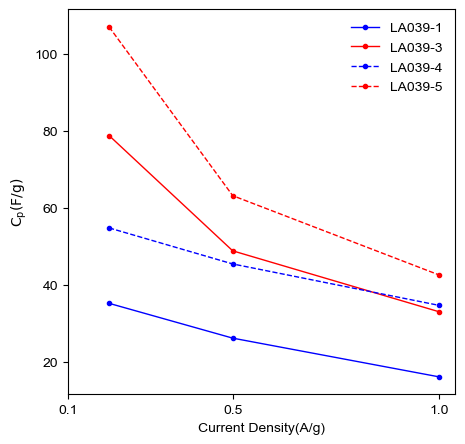

In [2]:
a1=[35.29, 26.26, 16.23]
a2=[78.81, 48.90, 33.12]
a3=[54.85, 45.50, 34.77]
a4=[107.00, 63.21 ,42.67]
b=[0.2, 0.5, 1]

plt.figure(figsize=(5, 5))
plt.plot(b, a1,'b.-', linewidth=1)
plt.plot(b, a2,'r.-', linewidth=1)
plt.plot(b, a3,'b.--', linewidth=1)
plt.plot(b, a4,'r.--', linewidth=1)
plt.xlabel('Current Density(A/g)')
plt.ylabel('$\mathrm{C_p(F/g)}$')
plt.xticks([0.1, 0.5, 1.0])
plt.legend(['LA039-1', 'LA039-3', 'LA039-4', 'LA039-5'], frameon=False)
plt.title('')
# plt.text()
plt.savefig("compare.eps", dpi=600,format="eps")
plt.show()